In [6]:
#from google.colab import drive
#drive.mount('/content/drive')

In [7]:
import pandas as pd
import numpy as np

In [8]:
names = ['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','state','district','cluster14','cluster15','cluster18','cluster20','cluster25','cluster27','cluster30','cluster35']

In [9]:
df = pd.read_csv("/content/drive/MyDrive/agroclimatic_clusters.csv")

In [10]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
0,1958,1,0,32.1,16.6,2,-0.1,maharashtra,solapur,8,7,0,7,12,23,15,23
1,1958,2,0,34.2,18.4,2,-0.5,maharashtra,solapur,8,7,0,7,12,23,15,23
2,1958,3,17,38.5,21.5,17,0.2,maharashtra,solapur,8,7,0,7,12,23,15,23
3,1958,4,32,40.2,25.3,32,0.8,maharashtra,solapur,8,7,0,7,12,23,15,23
4,1958,5,68,40.5,25.8,65,1.5,maharashtra,solapur,8,7,0,7,12,23,15,23


In [11]:
df['cluster15'].value_counts()

5     89280
11    62496
4     55800
7     55056
14    31992
1     29760
8     27528
2     24552
9     22320
12    14136
0     10416
13     6696
6      5952
3      4464
10     1488
Name: cluster15, dtype: int64

In [12]:
a = []
for i in range(len(df)):
    if df['cluster15'][i]!=4:
        a.append(i)

In [13]:
df = df.drop(a)

In [14]:
df.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),state,district,cluster14,cluster15,cluster18,cluster20,cluster25,cluster27,cluster30,cluster35
2232,1958,1,0,31.0,16.8,2,-0.1,karnataka,bijapur,1,4,0,19,12,9,15,23
2233,1958,2,0,33.0,18.8,2,-0.3,karnataka,bijapur,1,4,0,19,12,9,15,23
2234,1958,3,35,36.9,21.3,34,1.0,karnataka,bijapur,1,4,0,19,12,9,15,23
2235,1958,4,58,38.5,24.4,56,1.5,karnataka,bijapur,1,4,0,19,12,9,15,23
2236,1958,5,134,38.5,24.8,128,2.6,karnataka,bijapur,1,4,0,19,12,9,15,23


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55800 entries, 2232 to 434495
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            55800 non-null  int64  
 1   Month           55800 non-null  int64  
 2   ppt(mm)         55800 non-null  int64  
 3   tmax(degC)      55800 non-null  float64
 4   tmin(degC)      55800 non-null  float64
 5   aet(mm)         55800 non-null  int64  
 6   PDSI(unitless)  55800 non-null  float64
 7   state           55800 non-null  object 
 8   district        55800 non-null  object 
 9   cluster14       55800 non-null  int64  
 10  cluster15       55800 non-null  int64  
 11  cluster18       55800 non-null  int64  
 12  cluster20       55800 non-null  int64  
 13  cluster25       55800 non-null  int64  
 14  cluster27       55800 non-null  int64  
 15  cluster30       55800 non-null  int64  
 16  cluster35       55800 non-null  int64  
dtypes: float64(3), int64(12), o

In [16]:
conditions = df[['Year','Month','ppt(mm)','tmax(degC)','tmin(degC)','aet(mm)','PDSI(unitless)','district']]
conditions.shape

(55800, 8)

In [17]:
conditions.isnull().sum(axis = 0)

Year              0
Month             0
ppt(mm)           0
tmax(degC)        0
tmin(degC)        0
aet(mm)           0
PDSI(unitless)    0
district          0
dtype: int64

In [18]:
conditions["date"] = conditions['Month'].astype('str')+'-'+conditions["Year"].astype(str)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date
2232,1958,1,0,31.0,16.8,2,-0.1,bijapur,1-1958
2233,1958,2,0,33.0,18.8,2,-0.3,bijapur,2-1958
2234,1958,3,35,36.9,21.3,34,1.0,bijapur,3-1958
2235,1958,4,58,38.5,24.4,56,1.5,bijapur,4-1958
2236,1958,5,134,38.5,24.8,128,2.6,bijapur,5-1958


In [19]:
conditions['Day'] = [1] * len(conditions['Month'])
conditions['date'] = pd.to_datetime(conditions[['Year','Month','Day']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
conditions.head()

,Year,Month,ppt(mm),tmax(degC),tmin(degC),aet(mm),PDSI(unitless),district,date,Day
2232,1958,1,0,31.0,16.8,2,-0.1,bijapur,1958-01-01,1
2233,1958,2,0,33.0,18.8,2,-0.3,bijapur,1958-02-01,1
2234,1958,3,35,36.9,21.3,34,1.0,bijapur,1958-03-01,1
2235,1958,4,58,38.5,24.4,56,1.5,bijapur,1958-04-01,1
2236,1958,5,134,38.5,24.8,128,2.6,bijapur,1958-05-01,1


In [21]:
conditions['mid_temp'] = 0.5*(conditions['tmax(degC)']+conditions['tmin(degC)'])
conditions.drop(columns = ['tmax(degC)','tmin(degC)'],inplace = True)
conditions.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
2232,1958,1,0,2,-0.1,bijapur,1958-01-01,1,23.90
2233,1958,2,0,2,-0.3,bijapur,1958-02-01,1,25.90
2234,1958,3,35,34,1.0,bijapur,1958-03-01,1,29.10
2235,1958,4,58,56,1.5,bijapur,1958-04-01,1,31.45
2236,1958,5,134,128,2.6,bijapur,1958-05-01,1,31.65


In [22]:
conditions.tail()

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
434491,2019,8,206,127,1.3,latur,2019-08-01,1,25.90
434492,2019,9,258,104,1.9,latur,2019-09-01,1,25.45
434493,2019,10,187,101,4.6,latur,2019-10-01,1,24.80
434494,2019,11,20,68,5.3,latur,2019-11-01,1,23.80
434495,2019,12,6,29,5.8,latur,2019-12-01,1,22.40


In [23]:
conditions_truncated = conditions.loc[(conditions['Year']>1980) & (conditions['Year']<2019)]
conditions_val = conditions.loc[conditions['Year']==2019]

train = conditions_truncated[['date','ppt(mm)','mid_temp','aet(mm)','district']]
train.rename(columns = {'mid_temp':'y'}, inplace = True)

train.reset_index(inplace = True)
train.drop(columns = 'index',inplace = True)
train.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,ppt(mm),y,aet(mm),district
0,1981-01-01,5,22.90,8,bijapur
1,1981-02-01,0,26.00,2,bijapur
2,1981-03-01,35,28.60,35,bijapur
3,1981-04-01,43,31.15,42,bijapur
4,1981-05-01,45,31.50,43,bijapur


In [24]:
conditions_val

,Year,Month,ppt(mm),aet(mm),PDSI(unitless),district,date,Day,mid_temp
2964,2019,1,0,3,-2.2,bijapur,2019-01-01,1,22.75
2965,2019,2,1,2,-2.2,bijapur,2019-02-01,1,26.15
2966,2019,3,2,3,-2.3,bijapur,2019-03-01,1,29.85
2967,2019,4,11,12,-2.7,bijapur,2019-04-01,1,32.75
2968,2019,5,4,4,-3.5,bijapur,2019-05-01,1,34.05
...,...,...,...,...,...,...,...,...,...
434491,2019,8,206,127,1.3,latur,2019-08-01,1,25.90
434492,2019,9,258,104,1.9,latur,2019-09-01,1,25.45
434493,2019,10,187,101,4.6,latur,2019-10-01,1,24.80
434494,2019,11,20,68,5.3,latur,2019-11-01,1,23.80


In [25]:
from fbprophet import Prophet

In [26]:

model = Prophet()

In [27]:
conditions_truncated.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
train.rename(columns = {'date':'ds'}, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
train.tail()


,ds,ppt(mm),y,aet(mm),district
34195,2018-08-01,142,24.05,120,latur
34196,2018-09-01,131,24.50,117,latur
34197,2018-10-01,34,24.85,87,latur
34198,2018-11-01,9,22.70,28,latur
34199,2018-12-01,3,20.65,11,latur


In [30]:
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
fut = model.make_future_dataframe(periods = 13, freq = 'M')

In [32]:

forecast = model.predict(fut)

In [33]:
forecast.tail()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
464,2019-08-31,25.794880,23.865526,30.179638,25.787672,25.803837,1.112583,1.112583,1.112583,1.112583,1.112583,1.112583,0.0,0.0,0.0,26.907463
465,2019-09-30,25.788466,22.618188,29.048719,25.779509,25.800564,0.303238,0.303238,0.303238,0.303238,0.303238,0.303238,0.0,0.0,0.0,26.091704
466,2019-10-31,25.781837,19.527830,26.037037,25.770256,25.796449,-3.017391,-3.017391,-3.017391,-3.017391,-3.017391,-3.017391,0.0,0.0,0.0,22.764446
467,2019-11-30,25.775422,16.514768,22.693738,25.761620,25.792407,-6.233981,-6.233981,-6.233981,-6.233981,-6.233981,-6.233981,0.0,0.0,0.0,19.541442
468,2019-12-31,25.768794,15.778374,21.982516,25.752701,25.788592,-6.930731,-6.930731,-6.930731,-6.930731,-6.930731,-6.930731,0.0,0.0,0.0,18.838063


In [34]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
464,2019-08-31,26.907463,23.865526,30.179638
465,2019-09-30,26.091704,22.618188,29.048719
466,2019-10-31,22.764446,19.527830,26.037037
467,2019-11-30,19.541442,16.514768,22.693738
468,2019-12-31,18.838063,15.778374,21.982516


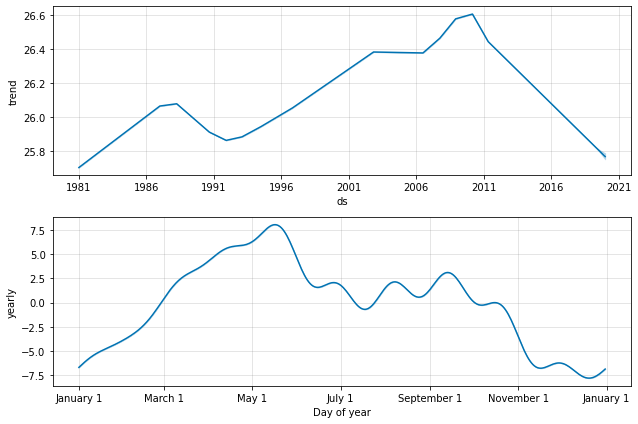

In [35]:
fig2 = model.plot_components(forecast)

In [36]:
forecast_2019 = forecast.tail(12)
forecast_2019["Month"] = forecast_2019["ds"].dt.month
print (forecast_2019[["yhat"]].shape,conditions_val[["mid_temp"]].shape)
test = pd.merge(conditions_val[["mid_temp","Month"]],forecast_2019[["yhat","Month"]])
# cols = ['ds','actual','yhat']
from sklearn.metrics import mean_squared_error
print (mean_squared_error(test["mid_temp"], test["yhat"]))
test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12, 1) (900, 1)
16.7145048913129


,mid_temp,Month,yhat
0,22.75,1,21.865853
1,20.50,1,21.865853
2,16.10,1,21.865853
3,15.85,1,21.865853
4,15.75,1,21.865853
...,...,...,...
895,17.55,12,18.838063
896,24.45,12,18.838063
897,15.60,12,18.838063
898,24.90,12,18.838063


In [37]:
import matplotlib.pyplot as plt

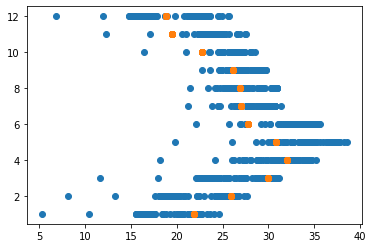

In [38]:
plt.scatter([test['mid_temp']],test['Month'])
plt.scatter([test['yhat']],test['Month'])
plt.show()


In [39]:
import pickle

In [40]:
filename = 'Cluster 15 - 4.sav'
pickle.dump(model, open(filename, 'wb'))

In [41]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(fut)

In [42]:
result.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,25.704391,15.838197,22.283382,25.704391,25.704391,-6.689507,-6.689507,-6.689507,-6.689507,-6.689507,-6.689507,0.0,0.0,0.0,19.014883
1,1981-02-01,25.709514,18.820108,25.331243,25.709514,25.709514,-3.850546,-3.850546,-3.850546,-3.850546,-3.850546,-3.850546,0.0,0.0,0.0,21.858968
2,1981-03-01,25.714142,23.130560,29.322994,25.714142,25.714142,0.451974,0.451974,0.451974,0.451974,0.451974,0.451974,0.0,0.0,0.0,26.166115
3,1981-04-01,25.719265,26.884705,33.287259,25.719265,25.719265,4.323114,4.323114,4.323114,4.323114,4.323114,4.323114,0.0,0.0,0.0,30.042379
4,1981-05-01,25.724223,28.969095,35.367668,25.724223,25.724223,6.291688,6.291688,6.291688,6.291688,6.291688,6.291688,0.0,0.0,0.0,32.015911
